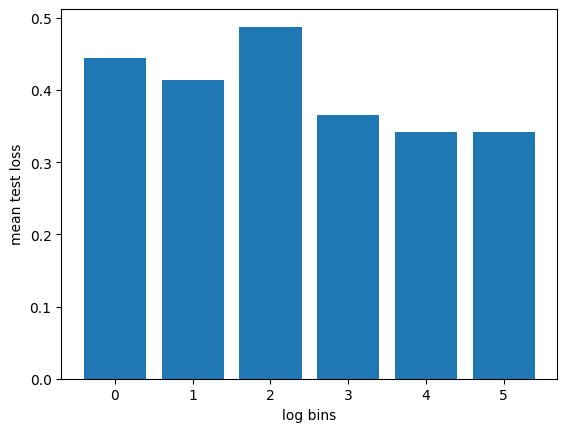

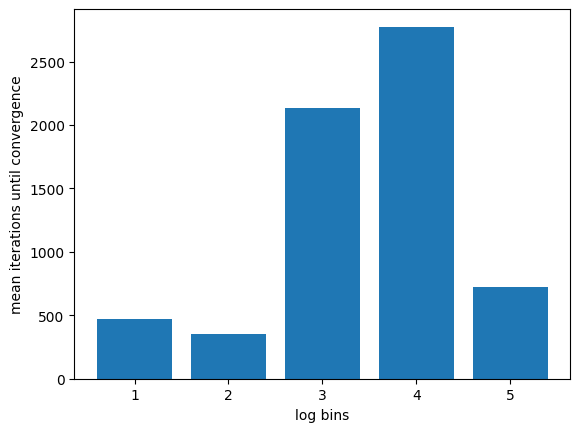

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from experiment import experiment
from experiment import test_loss
import random
scaler = MinMaxScaler(feature_range=(-1, 1))
"""
#loading and sorting the data
diabetes_data = pd.read_csv("diabetes.csv").to_numpy()
diabetes_x = diabetes_data[:,:-1]
diabetes_y = diabetes_data[:,-1]
diabetes_y = np.where(diabetes_y == 0,-1, diabetes_y)
# avoid overflow error

diabetes_x = scaler.fit_transform(diabetes_x)
bias = np.ones((diabetes_x.shape[0],1))
diabetes_x = np.hstack((bias,diabetes_x))
"""
#loading sonar data
sonar_data = pd.read_csv("sonar.csv").to_numpy()
sonar_x = sonar_data[:,:-1]
sonar_x = scaler.fit_transform(sonar_x)
#add intercept
bias = np.ones((sonar_data.shape[0],1))
sonar_x = np.hstack((bias, sonar_x)).astype(float)
sonar_y = sonar_data[:,-1]
#convert labels to +1 -1
sonar_y = np.where(sonar_y == "M",1,-1)

bins = [1,2,3,4,5]

normal_iters, quant_iters,  w_quant, w = experiment(sonar_x,sonar_y, bins)

In [6]:
from QuantLog import quantlogistic
from NormalLog import normallogistic

#generate random w to test gradient func on
w_test = np.random.rand(sonar_x.shape[1]) *2 -1

loss, ng = normallogistic(w_test,sonar_x.T,sonar_y.T)
loss, qg1 = quantlogistic(w_test,sonar_x.T,sonar_y.T,1)
loss, qg2 = quantlogistic(w_test,sonar_x.T,sonar_y.T,2)
loss, qg3 = quantlogistic(w_test,sonar_x.T,sonar_y.T,3)
loss, qg4 = quantlogistic(w_test,sonar_x.T,sonar_y.T,4)
loss, qg5 = quantlogistic(w_test,sonar_x.T,sonar_y.T,5)


gradients = np.hstack((ng,qg1,qg2,qg3,qg4,qg5))
print(gradients)

# the left col is the actual gradient, the 3 to the right are the gradients for 2,4,and 8 quantization levels 
# according to the scheme in QuantLog.py

[[ 0.23731377  0.352657    0.20933129  0.23008141  0.23648112  0.23719734]
 [-0.18166655 -0.2512006  -0.162104   -0.17589737 -0.18093286 -0.18147859]
 [-0.19118427 -0.27288992 -0.17243136 -0.18553132 -0.19039587 -0.19089143]
 [-0.19476945 -0.28071061 -0.17619009 -0.18923128 -0.19408683 -0.19475768]
 [-0.21061584 -0.30415716 -0.19069076 -0.20497574 -0.21027405 -0.21031655]
 [-0.1853528  -0.26065761 -0.16613166 -0.1798701  -0.18462805 -0.18493559]
 [-0.13063161 -0.19214226 -0.11491611 -0.1273319  -0.1294372  -0.13007463]
 [-0.10733366 -0.1624553  -0.09533292 -0.10561198 -0.10652968 -0.10660461]
 [-0.12960974 -0.18960527 -0.11747564 -0.12662753 -0.12861088 -0.12878413]
 [-0.16576885 -0.23117655 -0.15224515 -0.16297118 -0.16524785 -0.16514595]
 [-0.16493194 -0.2241655  -0.15138947 -0.1621941  -0.16452646 -0.16420745]
 [-0.16926646 -0.21912285 -0.15647339 -0.16618306 -0.16878957 -0.16875125]
 [-0.1550694  -0.19153485 -0.14462369 -0.151983   -0.15399358 -0.15472784]
 [-0.12684881 -0.16729496

[0.   0.   3.14 0.   0.  ]
